In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,Category,Message
5552,ham,Have a safe trip to Nigeria. Wish you happines...
222,ham,There is os called ubandu which will run witho...
5376,ham,I don't want you to leave. But i'm barely doin...
5414,ham,East coast
906,ham,Hey what's up charles sorry about the late reply.


In [4]:
df.shape

(5572, 2)

In [5]:
# 1 data cleaning- like remove the nan elements
# 2 EDA -> exporatory data analysis
# 3 Text preprocessing
# 4 model building
# 5 Evaluation
# 6 improvment
# 7 website

# Data cleaning

In [6]:
#rename column
df.rename(columns={'Category':'target','Message':'Text'},inplace=True)

In [7]:
df

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
#missing value
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       target   Text
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
5567   False  False
5568   False  False
5569   False  False
5570   False  False
5571   False  False

[5572 rows x 2 columns]>

In [12]:
# check for duplicate values
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool>

In [13]:
# remove duplicated
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5157, 2)

# EDA


In [15]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1b67392ff70>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

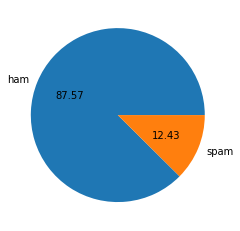

In [17]:
#pie chart

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')

In [18]:
# spam is very low as compared to ham to we can say that data is inbalanced

In [19]:
# now we making three columns for number of -> character,word ,sentences    for this we use nltk lib

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91756\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#num of character
df['num_characters']=df['Text'].apply(len)

C:\Users\91756\AppData\Local\Temp\ipykernel_6076\2411038245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [23]:
#num of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\91756\AppData\Local\Temp\ipykernel_6076\574442349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
#num of sentence
df['num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\91756\AppData\Local\Temp\ipykernel_6076\2887259818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#it is for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#it is for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [29]:
#from above observation of dataset is that spam has more number character and also sentence as compared to the ham mssg
#now we use histogram to plot this data

import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

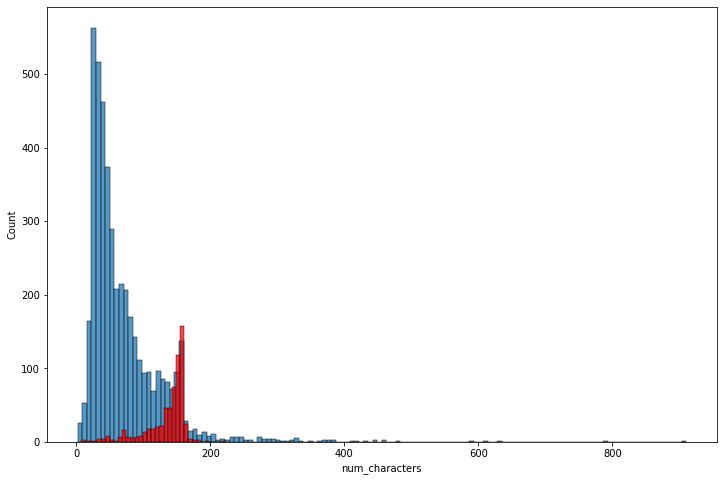

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])     # both returning number
sns.histplot(df[df['target']==1]['num_characters'],color='red')    #

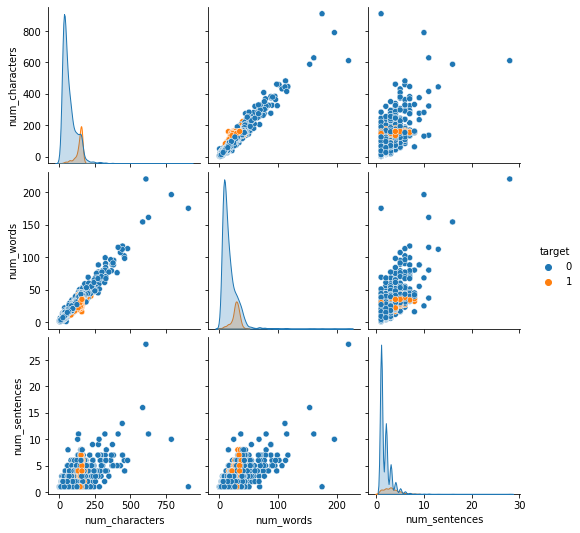

In [31]:
#how to find the relation btw these three column number of words,char,sent
sns.pairplot(df,hue='target')

<AxesSubplot:>

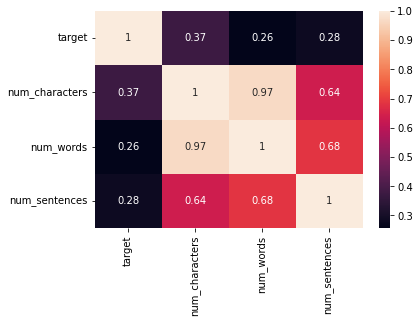

In [32]:
sns.heatmap(df.corr(),annot=True)

# 3.Data preprocessing
Lower case,
tokenization,
removing special characters,
removing shop words and punctuation,
stemming


we convert each sent. to lower case

punctuation-> remove -!etc

#stop words mean which is not so imp word like is , of etc

#Stemming means we convert the dancing, dancer,etc to dance only

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)   #separating words
    
    y=[]
    for i in text:
        if i.isalnum():       # it is used to check numeric or not  or it used to clear out the special char
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    
    return " ".join(y)

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91756\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
transform_text('Did you like m presentation  on ML?')

'like present ml'

In [36]:
#stemming->
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [37]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
df['transformed_text']=df['Text'].apply(transform_text)

C:\Users\91756\AppData\Local\Temp\ipykernel_6076\3574485815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Text'].apply(transform_text)


In [39]:
df.head()

,target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
# now we do word clouding for spam / ham message which highlight the important word in spam or hame text
!pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

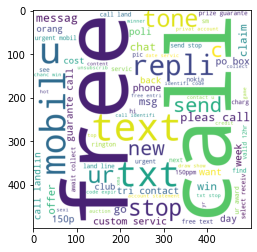

In [43]:
plt.imshow(spam_wc)
# these mostly message is present in the spam

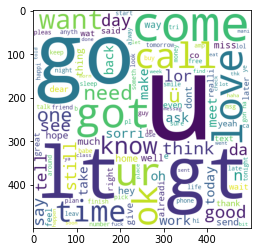

In [44]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
# these mostly message is present in the ham

In [45]:
# next thing to do is to find out the most coming word from the spam/ham mssg
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [46]:
len(spam_corpus)

9781

c:\users\91756\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


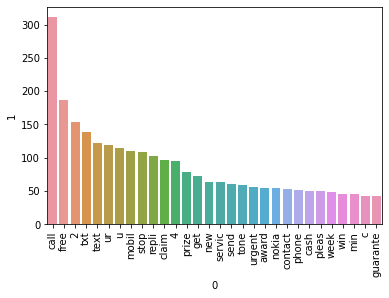

In [47]:
# we used a counter which count the frequency of the each words

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#Model building

In [48]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3000)

In [49]:
X=tfidf.fit_transform(df['transformed_text']).toarray() 

In [50]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
y=df['target'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8662790697674418
[[784 121]
 [ 17 110]]
0.47619047619047616


In [58]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [59]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835271317829457
[[903   2]
 [ 15 112]]
0.9824561403508771


In [60]:
# precision play a very role so we need to chose the model on the basis of this 
# so we see that mnb perform very well then we chose the mnb
#precision mean no error giving , if the message is not spam the model also said that it is not spam
#tfid and 

In [61]:
# we just store the vectorizer and our model in file which can be used in the website 
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))